## Accident by hour of day

In [10]:
import pandas as pd
import numpy as np
from google.cloud import bigquery

#Extract the data from bigquery
client = bigquery.Client(project='phydata-desafio1')
QUERY6 = """
SELECT
  state_name,
  EXTRACT(HOUR FROM timestamp_of_crash) AS hour_of_day,
  COUNT(*) AS fatal_number
FROM
  `phydata-desafio1.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
  state_name, hour_of_day
ORDER BY
state_name, hour_of_day
  """
query_job = client.query(QUERY6)  # API request
results = query_job.result()  # Waits for query to finish
data_frame_hour = results.to_dataframe()
name_database = 'state_name_accidents_by_hour_of_day' # Name of the database
data_frame_hour.to_csv(name_database + '.csv', index=False) #Save the data in a csv file

Text(0.5, 1.0, 'Accidents by hour')

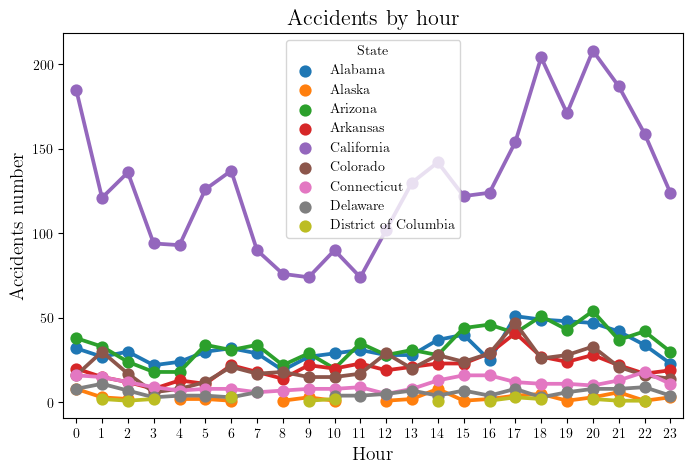

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear el gráfico con seaborn
df = pd.read_csv('state_name_accidents_by_hour_of_day.csv')
result_limitado = df.head(200)
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.pointplot(x='hour_of_day', y='fatal_number', data=result_limitado, hue='state_name')
legend = plt.legend(title="State")
# legend.set_zorder(2)  # Ajusta el valor de zorder para colocar la leyenda por encima de las líneas


# Etiquetas y título
plt.xlabel(r'Hour',fontdict={'fontsize': 14})
plt.ylabel(r'Accidents number',fontdict={'fontsize': 14})
plt.title(r'Accidents by hour',fontdict={'fontsize': 16})
# plt.xticks(rotation=60)